In [1]:
# results_path = "/robin-west/VBD/config/_table_2/results/combined_results.pkl"
results_path = "/robin-west/VBD/config/_table_2/results_0227/table2.pkl"

In [2]:
import pickle 
with open(results_path, 'rb') as results_f:
    results = pickle.load(results_f)

In [3]:
from copy import deepcopy
ref = deepcopy(results['ms15'])

In [4]:
import numpy as np
mask = np.asarray(ref['offroad']) < 0.4
np.mean(np.asarray(ref['offroad'])[mask])

0.0043771043

In [5]:
# N scenario  x k method x d metric 
results_dir_dict = {
    '1': '/robin-west/VBD/config/_table_2/results/scale_0.0_cond_None_means_type_steer_and_speed_gradients_scale_1/*.pkl',
    '01': '/robin-west/VBD/config/_table_2/results/scale_0.0_cond_None_means_type_steer_and_speed_gradients_scale_0.1/*.pkl',
    '10': '/robin-west/VBD/config/_table_2/results/scale_0.0_cond_None_means_type_steer_and_speed_gradients_scale_10/*.pkl',
    'c': '/robin-west/VBD/config/_table_2/results/scale_0.0_cond_20_means_type_steer_and_speed_gradients_scale_0.0/*.pkl',
    'ms8': '/robin-west/VBD/config/_table_2/results/scale_8.0_cond_None_means_type_steer_and_speed_gradients_scale_0.0/*.pkl',
    'ms15': '/robin-west/VBD/config/_table_2/results/scale_15.0_cond_None_means_type_steer_and_speed_gradients_scale_0.0/*.pkl',
}

In [6]:
results_metric = np.zeros((2309, 6, 4))
methods = ['1', '01', '10', 'c', 'ms8', 'ms15']
metric = ['offroad', 'steer_acc', 'speed_acc', 'acc']

for m in range(len(methods)):
    for d in range(len(metric)):
        results_metric[:,m,d] = results[methods[m]][metric[d]]

In [9]:
results_metric.shape
with open('/robin-west/VBD/config/_table_2/results_0227/results_metric.pkl', 'wb') as results_metric_f:
    pickle.dump(results_metric, results_metric_f)

In [9]:
acc_check = np.where(results_metric[:, -1, -1] > 0 )[0]
results_metric_ = results_metric[acc_check] 
print(results_metric_.shape)
print(np.mean(results_metric_, axis=0))

(329, 6, 4)
[[0.17527862 0.75785208 0.51367781 0.40020263]
 [0.15704154 0.74569402 0.48530902 0.3556231 ]
 [0.23201621 0.74670719 0.63120567 0.50557244]
 [0.32218845 0.68895643 0.86828774 0.58865248]
 [0.16514691 0.7710233  0.67983789 0.51469098]
 [0.17426545 0.87740628 0.94427558 0.83080041]]


In [11]:
offroad_thres = 0.5
acc_thres = 0.005

In [ ]:
# offroad_check = np.mean(results_metric[:,:,0], axis=-1)
# valid_indices = np.where(offroad_check < offroad_thres)[0]
# results_metric_ = results_metric[valid_indices] 
# print(results_metric_.shape)
# print(np.mean(results_metric_, axis=0))
# # acc_check = np.max(results_metric_[:,:,-1], axis=-1)
# acc_check = np.where(results_metric_[:, -1, -1] > 0 )[0]
# results_metric__ = results_metric_[acc_check]
# print(results_metric__.shape)
# print(np.mean(results_metric__, axis=0))


(1835, 6, 4)
[[0.16112625 0.40290645 0.33841962 0.13660309]
 [0.09300636 0.27247956 0.31389646 0.08446866]
 [0.27029973 0.41598547 0.42833787 0.19037239]
 [0.19673025 0.22924614 0.68010899 0.1729337 ]
 [0.06121708 0.24032698 0.46303361 0.10063579]
 [0.0599455  0.23960036 0.54986376 0.12352407]]
(271, 6, 4)
[[0.07134071 0.79704797 0.4895449  0.40467405]
 [0.06642067 0.78351784 0.45264453 0.35916359]
 [0.13776138 0.78474785 0.61623616 0.51783518]
 [0.23124231 0.70602706 0.86223862 0.59901599]
 [0.09840098 0.7896679  0.66666667 0.51783518]
 [0.0897909  0.88314883 0.94341943 0.83640836]]


In [12]:
print(results_metric__.shape)

(203, 6, 4)

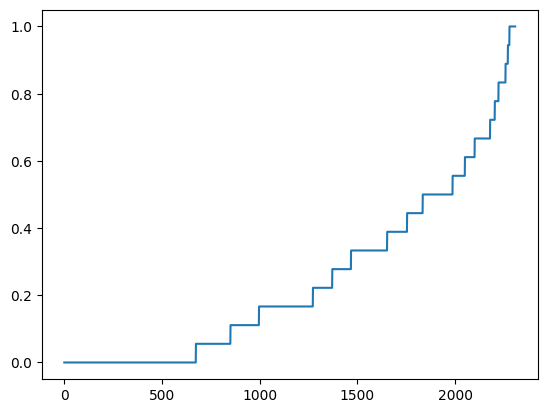

In [41]:
import matplotlib.pyplot as plt
plt.plot(np.sort(offroad_check))
# plt.ylim(0,0.2)

In [42]:
np.linspace(0,1,10)


array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [32]:
results_metric.shape

(2309, 6, 4)

In [60]:
offroad_thres = 0.5

offroad_check_mean = np.mean(results_metric[:,:,0], axis=-1)
offroad_check = np.where(offroad_check_mean < offroad_thres)[0]
# offroad_check = np.where(
#     (results_metric[:, -1, 0] < 0.7) & (results_metric[:, 2, 0] < 0.7)
# )[0]
results_metric_ = results_metric[offroad_check] 
print(results_metric_.shape)
print(np.mean(results_metric_, axis=0))
acc_check = np.where(results_metric_[:, -1, -1] > 0 )[0]
# acc_check = np.where(
#     (results_metric_[:, -1, -1] > 0.) |
#     (results_metric_[:, -2, -1] > 0.) 
#  )[0]
# acc_check = np.where(
#     (results_metric_[:, -1, -2] > 0.4) &
#     (results_metric_[:, -1, -3] > 0.4) & 
#     (results_metric_[:, 2, -2] > 0.1) & 
#     (results_metric_[:, 2, -3] > 0.1) 
#  )[0]
results_metric__ = results_metric_[acc_check]
print(results_metric__.shape)
print(np.mean(results_metric__, axis=0))

(1835, 6, 4)
[[0.16112625 0.40290645 0.33841962 0.13660309]
 [0.09300636 0.27247956 0.31389646 0.08446866]
 [0.27029973 0.41598547 0.42833787 0.19037239]
 [0.19673025 0.22924614 0.68010899 0.1729337 ]
 [0.06121708 0.24032698 0.46303361 0.10063579]
 [0.0599455  0.23960036 0.54986376 0.12352407]]
(271, 6, 4)
[[0.07134071 0.79704797 0.4895449  0.40467405]
 [0.06642067 0.78351784 0.45264453 0.35916359]
 [0.13776138 0.78474785 0.61623616 0.51783518]
 [0.23124231 0.70602706 0.86223862 0.59901599]
 [0.09840098 0.7896679  0.66666667 0.51783518]
 [0.0897909  0.88314883 0.94341943 0.83640836]]


In [61]:
offroad_thres = 0.5

offroad_check_mean = np.mean(results_metric[:,:,0], axis=-1)
offroad_check = np.where(offroad_check_mean < offroad_thres)[0]
# offroad_check = np.where(
#     (results_metric[:, -1, 0] < 0.7) & (results_metric[:, 2, 0] < 0.7)
# )[0]
results_metric_ = results_metric[offroad_check] 
print(results_metric_.shape)
print(np.mean(results_metric_, axis=0))
acc_check = np.where(
    (results_metric_[:, -1, -1] > 0.) |
    (results_metric_[:, -2, -1] > 0.) 
 )[0]
# acc_check = np.where(
#     (results_metric_[:, -1, -2] > 0.4) &
#     (results_metric_[:, -1, -3] > 0.4) & 
#     (results_metric_[:, 2, -2] > 0.1) & 
#     (results_metric_[:, 2, -3] > 0.1) 
#  )[0]
results_metric__ = results_metric_[acc_check]
print(results_metric__.shape)
print(np.mean(results_metric__, axis=0))

(1835, 6, 4)
[[0.16112625 0.40290645 0.33841962 0.13660309]
 [0.09300636 0.27247956 0.31389646 0.08446866]
 [0.27029973 0.41598547 0.42833787 0.19037239]
 [0.19673025 0.22924614 0.68010899 0.1729337 ]
 [0.06121708 0.24032698 0.46303361 0.10063579]
 [0.0599455  0.23960036 0.54986376 0.12352407]]
(336, 6, 4)
[[0.07242064 0.78472222 0.50297619 0.40873016]
 [0.06845238 0.75892857 0.45535714 0.35218254]
 [0.13392857 0.7609127  0.62202381 0.50694444]
 [0.25793651 0.68650794 0.86805556 0.5843254 ]
 [0.09126984 0.79265873 0.70436508 0.54960317]
 [0.08134921 0.82837302 0.83035714 0.67460317]]


In [82]:
offroad_thres = 0.5

# offroad_check_mean = np.mean(results_metric[:,:,0], axis=-1)
# offroad_check = np.where(offroad_check_mean < offroad_thres)[0]
offroad_check = np.where(
    (results_metric[:, -1, 0] < 0.8) | (results_metric[:, 2, 0] < 0.8)
)[0]
results_metric_ = results_metric[offroad_check] 
print(results_metric_.shape)
print(np.mean(results_metric_, axis=0))
# acc_check = np.where(
#     (results_metric_[:, -1, -1] > 0.) |
#     (results_metric_[:, -2, -1] > 0.) 
#  )[0]
acc_check = np.where(
    (results_metric_[:, -1, -2] > 0.7) |
    (results_metric_[:, -1, -3] > 0.7) 
 )[0]
results_metric__ = results_metric_[acc_check]
print(results_metric__.shape)
print(np.mean(results_metric__, axis=0))

(2180, 6, 4)
[[0.2616208  0.40412844 0.34785933 0.13883792]
 [0.17996942 0.26880734 0.32568807 0.08455657]
 [0.34250765 0.41926606 0.42691131 0.18960245]
 [0.28639144 0.23379205 0.68944954 0.1766055 ]
 [0.11269113 0.23654434 0.46605505 0.10061162]
 [0.09097859 0.23730887 0.54495413 0.11957187]]
(1355, 6, 4)
[[0.25067651 0.47232472 0.46199262 0.19261993]
 [0.18056581 0.36309963 0.44206642 0.12447724]
 [0.31266913 0.48364084 0.53480935 0.25387454]
 [0.27921279 0.30184502 0.80418204 0.23271833]
 [0.11611316 0.34218942 0.67699877 0.15793358]
 [0.10381304 0.35473555 0.83493235 0.1896679 ]]
